In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('churn.csv')

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop('customerID',inplace=True,axis=1)

In [7]:
x=df.drop('Churn',axis=1)
col=x.columns
for m in col:
    print(df.groupby(m)['Churn'].value_counts())

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64
SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64
Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64
Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64
tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
3       No       106
        Yes       94
4       No        93
        Yes       83
5       No        69
        Yes       64
6       No        70
        Yes       40
7       No        80
        Yes       51
8       No        81
        Yes       42
9       No        73
        Yes       46
10      No     

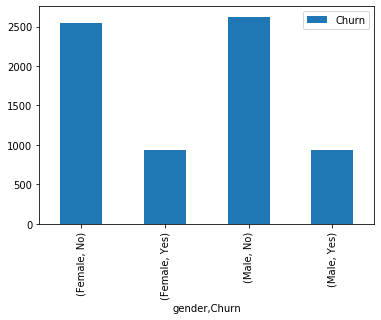

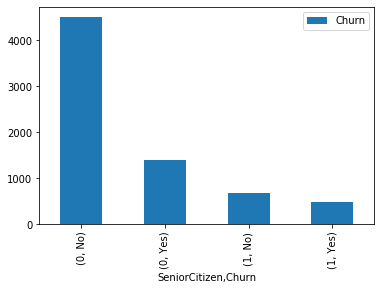

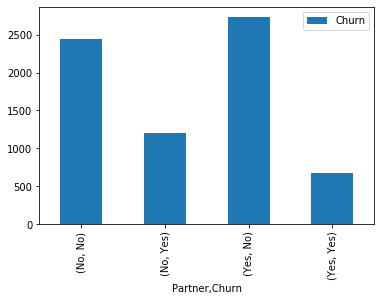

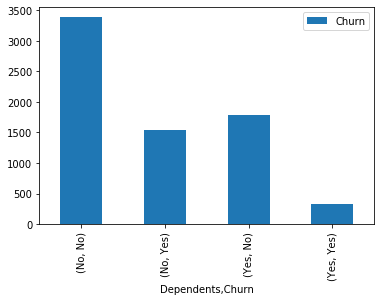

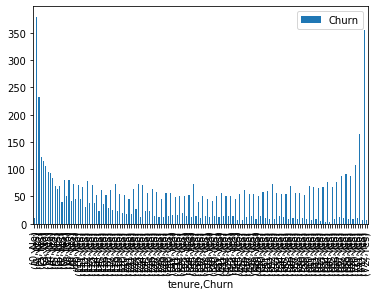

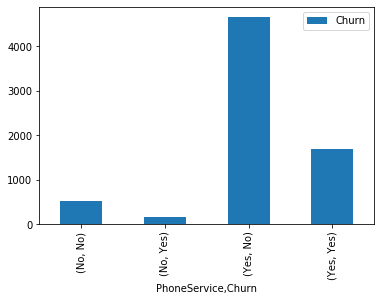

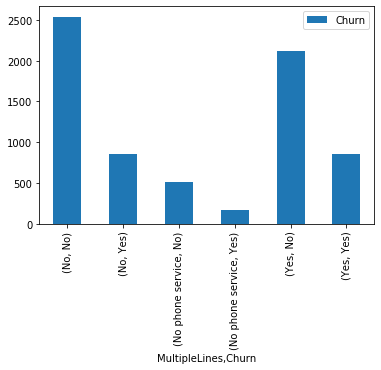

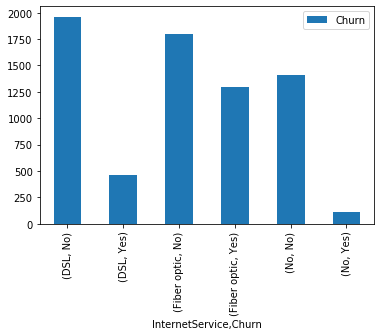

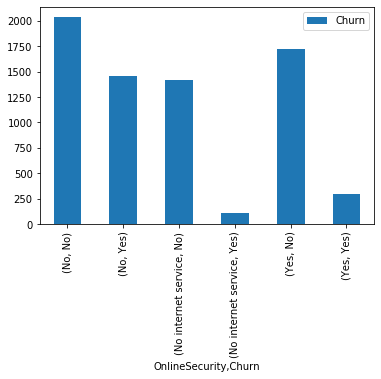

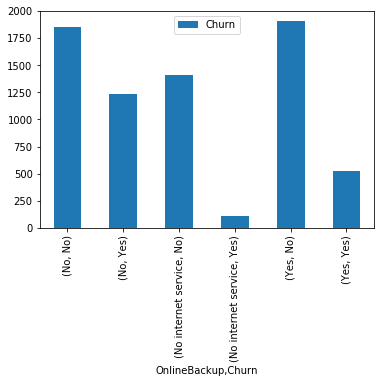

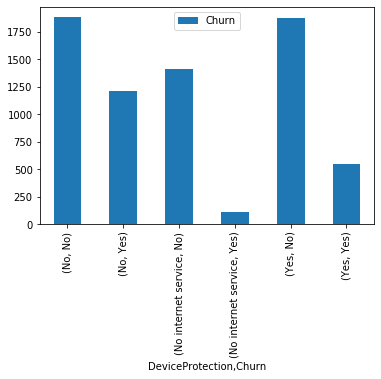

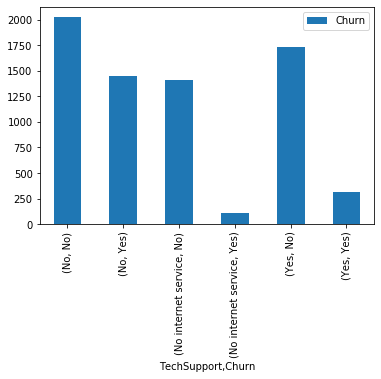

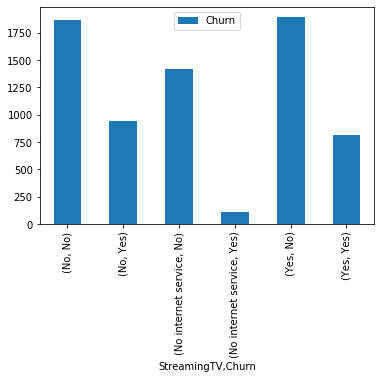

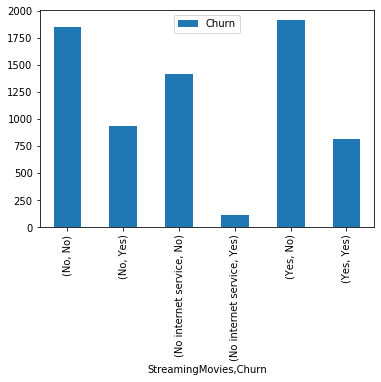

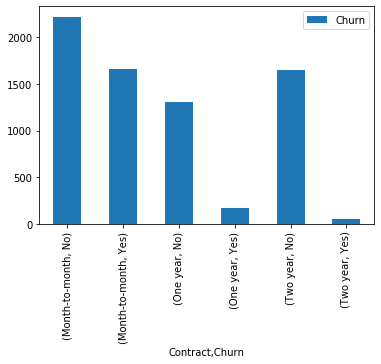

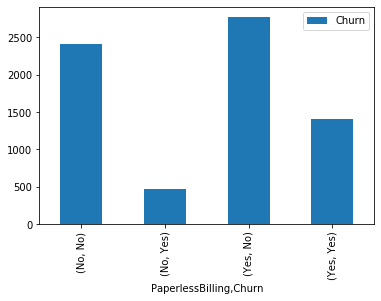

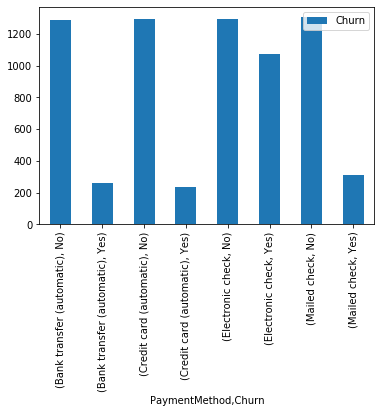

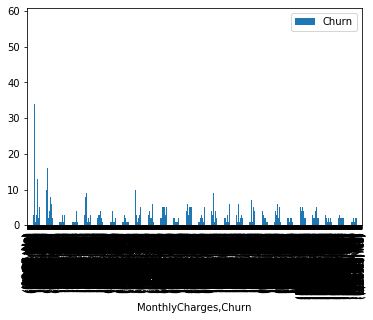

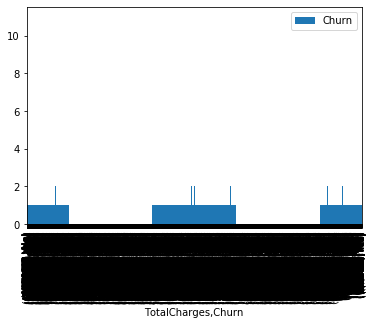

In [8]:
for m in col:
    (pd.DataFrame(df.groupby(m)['Churn'].value_counts())).plot.bar()

In [27]:
drop=['gender','SeniorCitizen','StreamingTV','StreamingMovies']
df.drop(drop,inplace=True,axis=1)

In [28]:
df.dtypes


Partner             float64
Dependents          float64
tenure              float64
PhoneService          int32
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [29]:

convert=['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalCharges', 'Churn']


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
for m in convert:
    df[m]=le.fit_transform(df[m].values.reshape(-1,1))

KeyError: 'gender'

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
column=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
for m in column:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,0,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,0,0,-0.828207,0.829798,0.398558,-1.160323,-0.398608,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,1,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,0,0,0.371271,-1.205113,1.334863,-0.259629,-0.948762,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,1,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,0,0,-0.828207,0.829798,1.334863,-0.362660,-1.641883,1
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,0,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,0,0,0.371271,-1.205113,-1.474052,-0.746535,-0.983710,0
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,1,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,0,0,-0.828207,0.829798,0.398558,0.197365,-1.235224,1


In [18]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


In [60]:
x=df.drop('Churn',axis=1)

In [61]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier as dtr
from sklearn.svm import SVC as svm
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier as rfr
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.preprocessing import StandardScaler as ss

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.combine import SMOTETomek as smk
from imblearn.under_sampling import NearMiss as nm

In [128]:
lr,dtr,svm,rfr,knn,smk,nm=lr(),dtr(),svm(),rfr(),knn(),smk(),nm()

In [129]:
model=[lr,dtr,svm,rfr,knn]

In [130]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)

In [131]:
x,y=smk.fit_sample(x,y)

In [132]:
for m in model:
    m.fit(xtrain,ytrain)
    print('train score of', m, 'is', m.score(xtrain,ytrain))
    print('test score of', m, 'is', m.score(xtest,ytest))
    print('accuracy score of', m, 'is',accuracy_score(m.predict(xtest),ytest))
    print('classification report of', m, 'is', classification_report(m.predict(xtest),ytest))
    print('cross val mean of', m, 'is',cross_val_score(m,x,y,cv=10,scoring='recall').mean())

train score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.7827643171806168
test score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.782411230388109
accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='wa

cross val mean of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.8581879038310575
train score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.873898678414097
test score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.8125516102394715
accuracy score of KNeigh

In [133]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
imp=rfr.feature_importances_

In [135]:
features=['Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [136]:
pd.DataFrame({'imp':imp,'features':features}).sort_values('imp')

ValueError: arrays must all be same length

In [ ]:
drop=['PhoneService','Dependents','MultipleLines','Partner']

In [ ]:
df.drop(drop,inplace=True,axis=1)

In [137]:
x=df.drop('Churn',axis=1)
y=df.iloc[:,-1].values.reshape(-1,1)


In [138]:
x,y=smk.fit_sample(x,y)

In [139]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)

In [140]:
for m in model:
    m.fit(xtrain,ytrain)
    print('train score of', m, 'is', m.score(xtrain,ytrain))
    print('test score of', m, 'is', m.score(xtest,ytest))
    print('accuracy score of', m, 'is',accuracy_score(m.predict(xtest),ytest))
    print('classification report of', m, 'is', classification_report(m.predict(xtest),ytest))
    print('cross val mean of', m, 'is',cross_val_score(m,x,y,cv=10).mean())

train score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.780201573933453
test score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.7855072463768116
accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='wa

cross val mean of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.8675772961177977
train score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.877813060886373
test score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.8082815734989648
accuracy score of KNeigh

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
confusion_matrix(rfr.predict(xtest),ytest)

array([[1058,  215],
       [ 150,  992]], dtype=int64)

In [144]:
ada=ada(base_estimator=rfr,n_estimators=100)

In [145]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [146]:
ada.score(xtrain,ytrain)

0.9972387132403701

In [147]:
print(classification_report(ada.predict(xtest),ytest))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1213
           1       0.86      0.87      0.87      1202

    accuracy                           0.87      2415
   macro avg       0.87      0.87      0.87      2415
weighted avg       0.87      0.87      0.87      2415



In [148]:
import pickle

In [149]:
churn_model=pickle.dumps(ada)